# Delivery time distribution of an optimal policy

Here, we calculate the delivery time distribution of an optimal policy. We employ Monte Carlo simulations to estimate the probability distributions.

The figures produced in this notebook are used in our paper ([arXiv:2207.06533](https://arxiv.org/abs/2207.06533)).

In [1]:
import numpy as np
import random
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
import pickle
from pathlib import Path
import functools
import os
import time
import datetime
import sys
import importlib as imp

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Dark background?
dark = False
if dark==True:
    plt.style.use('dark_background')
else:
    plt.style.use('default')

# Latex
from matplotlib import rc
rc('text', usetex=True)
from matplotlib import colors as pltc
from matplotlib.cm import ScalarMappable

import main
from environment import Environment

# Save figures in the notebook with decent quality
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

<br/>

<br/>


---

# $n=5$, $p=0.5$, $p_\mathrm{s}=0.5$, $t_\mathrm{cut}=2$

In [2]:
### INPUTS ###
n = 5
p = 0.5
p_s = 0.5
cutoff = 2
policy = 'optimal'

# Numerical
randomseed = 2
tolerance = 1e-5
N_samples = int(1e5)

# Plot specs
fontsizes = 10
fontsizes_ticks = fontsizes-1
x_cm = 8
y_cm = 5

savefig = True

In [3]:
_, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)

if main.check_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance):
    data = main.load_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance)
else:
    main.simulate_environment(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance,
                              progress_bar='notebook', savedata=True)
    data = main.load_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance)

In [4]:
print('Expected delivery time optimal policy: %.2f'%(-(state_info[0]['value']+1)))
print('Simulation 95%% interval of confidence: (%.2f, %.2f)'%(data['avg']-2*data['std']/(data['N_samples']**0.5),
                                                        data['avg']+2*data['std']/(data['N_samples']**0.5)))

Expected delivery time optimal policy: 26.78
Simulation 95% interval of confidence: (26.53, 26.85)


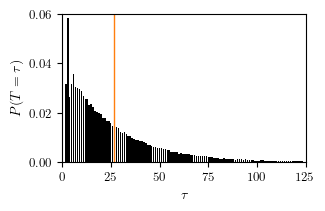

In [5]:
## PLOT ##
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

if dark==True:
    col = 'w'
else:
    col = 'k'

plt.bar(data['bins'][:-1]+0.5, data['hist'], color=col)#, width = 0.5)
plt.plot([data['avg'],data['avg']],[0,1], color='tab:orange', linewidth=1)

plt.xlabel(r'$\tau$')
plt.ylabel(r'$P(T=\tau)$')

plt.xlim(0,125)
plt.ylim(0,0.06)

#x_minor_intervals = 10 # Number of minor intervals between two major ticks               
#ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(x_minor_intervals))
ax.tick_params(labelsize=fontsizes_ticks)

if savefig:
    filename = ('MANUSCRIPT_figs/delivery-time-distribution_%s_n%s'+
                '_p%.3f_ps%.3f_tcut%d_Nsamples%d_randseed%d.pdf')%(policy, n, p, p_s,
                                              cutoff, N_samples, randomseed)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()

<br/>

<br/>


---

# $n=5$, $p=0.9$, $p_\mathrm{s}=0.5$, $t_\mathrm{cut}=2$

In [6]:
### INPUTS ###
n = 5
p = 0.9
p_s = 0.5
cutoff = 2
policy = 'optimal'

# Numerical
randomseed = 2
tolerance = 1e-5
N_samples = int(1e5)

# Plot specs
fontsizes = 10
fontsizes_ticks = fontsizes-1
x_cm = 8
y_cm = 5

savefig = True

In [7]:
_, state_info, _ = main.load_policyiter_data(n, p, p_s, cutoff, tolerance)

if main.check_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance):
    data = main.load_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance)
else:
    main.simulate_environment(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance,
                              progress_bar='notebook', savedata=True)
    data = main.load_sim_data(policy, n, p, p_s, cutoff,
                              N_samples, randomseed, tolerance)

In [8]:
print('Expected delivery time optimal policy: %.2f'%(-(state_info[0]['value']+1)))
print('Simulation 95%% interval of confidence: (%.2f, %.2f)'%(data['avg']-2*data['std']/(data['N_samples']**0.5),
                                                        data['avg']+2*data['std']/(data['N_samples']**0.5)))

Expected delivery time optimal policy: 8.32
Simulation 95% interval of confidence: (8.25, 8.34)


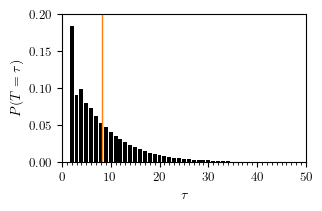

In [9]:
## PLOT ##
fig, ax = plt.subplots(figsize=(x_cm/2.54, y_cm/2.54))

if dark==True:
    col = 'w'
else:
    col = 'k'

plt.bar(data['bins'][:-1]+0.5, data['hist'], color=col)#, width = 0.5)
plt.plot([data['avg'],data['avg']],[0,1], color='tab:orange', linewidth=1)

plt.xlabel(r'$\tau$')
plt.ylabel(r'$P(T=\tau)$')

plt.xlim(0,50)
plt.ylim(0,0.2)

x_minor_intervals = 10 # Number of minor intervals between two major ticks               
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(x_minor_intervals))
ax.tick_params(labelsize=fontsizes_ticks)

if savefig:
    filename = ('MANUSCRIPT_figs/delivery-time-distribution_%s_n%s'+
                '_p%.3f_ps%.3f_tcut%d_Nsamples%d_randseed%d.pdf')%(policy, n, p, p_s,
                                              cutoff, N_samples, randomseed)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
else:
    plt.show()